## Importing Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[Data Being Used](https://www.kaggle.com/zaurbegiev/my-dataset#credit_train.csv)

In [2]:
bank_df = pd.read_csv("Data/bank.csv")
bank_df.shape  # Checking the shape of the dataframe

(100514, 19)

## Looking at Datframe

In [3]:
bank_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
bank_df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing values

In [5]:
# Checking for missing values
bank_df.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

## Missing values

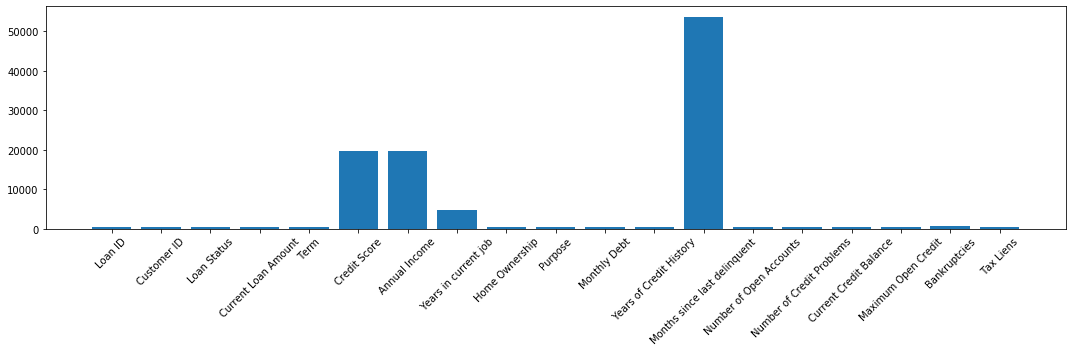

In [27]:
fig, ax = plt.subplots(figsize=(15, 5))

x = bank_df.isna().sum().index
y = bank_df.isna().sum()
ax.bar(x=x, height=y)
ax.set_xticklabels(x, rotation = 45)
plt.tight_layout();

In [6]:
"""
Removing features that are
30% or less NaN values
"""

# df.count() does not include NaN values
df2 = bank_df[[column for column in bank_df if bank_df[column].count() / len(bank_df) >= 0.3]]

# Checking to see which columns were dropped
print("List of dropped columns:", end=" ")

# If columns in the orignial df is not found in the new df then we dropped those columns
for c in bank_df.columns:
    if c not in df2.columns:
        print(c, end=", ")
else:
    print("No Columns Dropped")
print('\n')

bank_df = df2

List of dropped columns: No Columns Dropped




In [ ]:
# Dropping missing values
bank_df.dropna(inplace=True)

In [8]:
bank_df.shape  # Number of columns and rows left after dropping missing values

(36423, 19)

## Dependent Variable

**Observation:**
Dependent varibale has to values and will need to be balanced to get a more accurate model

In [28]:
# Checking the value counts of the dependent variable
bank_df.Loan_Status.value_counts(normalize=True)

Fully Paid     0.795431
Charged Off    0.204569
Name: Loan_Status, dtype: float64

In [10]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,36423.0,1.377581e+07,3.406789e+07,21450.0,190784.000,324720.00,542190.00,1.000000e+08
Credit Score,36423.0,1.055689e+03,1.438253e+03,585.0,702.000,721.00,738.00,7.510000e+03
Annual Income,36423.0,1.464561e+06,9.357681e+05,111245.0,930905.000,1260498.00,1742765.50,3.083900e+07
Monthly Debt,36423.0,1.926925e+04,1.210093e+04,0.0,11125.735,17117.48,24766.12,2.290579e+05
Years of Credit History,36423.0,1.906500e+01,6.654911e+00,3.8,14.500,17.70,22.40,7.050000e+01
Months since last delinquent,36423.0,3.485136e+01,2.191660e+01,0.0,16.000,31.00,51.00,1.760000e+02
Number of Open Accounts,36423.0,1.149082e+01,4.991626e+00,1.0,8.000,11.00,14.00,4.800000e+01
Number of Credit Problems,36423.0,1.860363e-01,5.282482e-01,0.0,0.000,0.00,0.00,1.500000e+01
Current Credit Balance,36423.0,2.636261e+05,3.176197e+05,0.0,101051.500,186960.00,328434.00,7.350321e+06
Maximum Open Credit,36423.0,6.651413e+05,5.703167e+06,0.0,247291.000,421476.00,702966.00,7.982554e+08


## Changing Column Names

In [11]:
# Changing column names to be more suitable
bank_df.columns = bank_df.columns.str.replace(' ', '_')

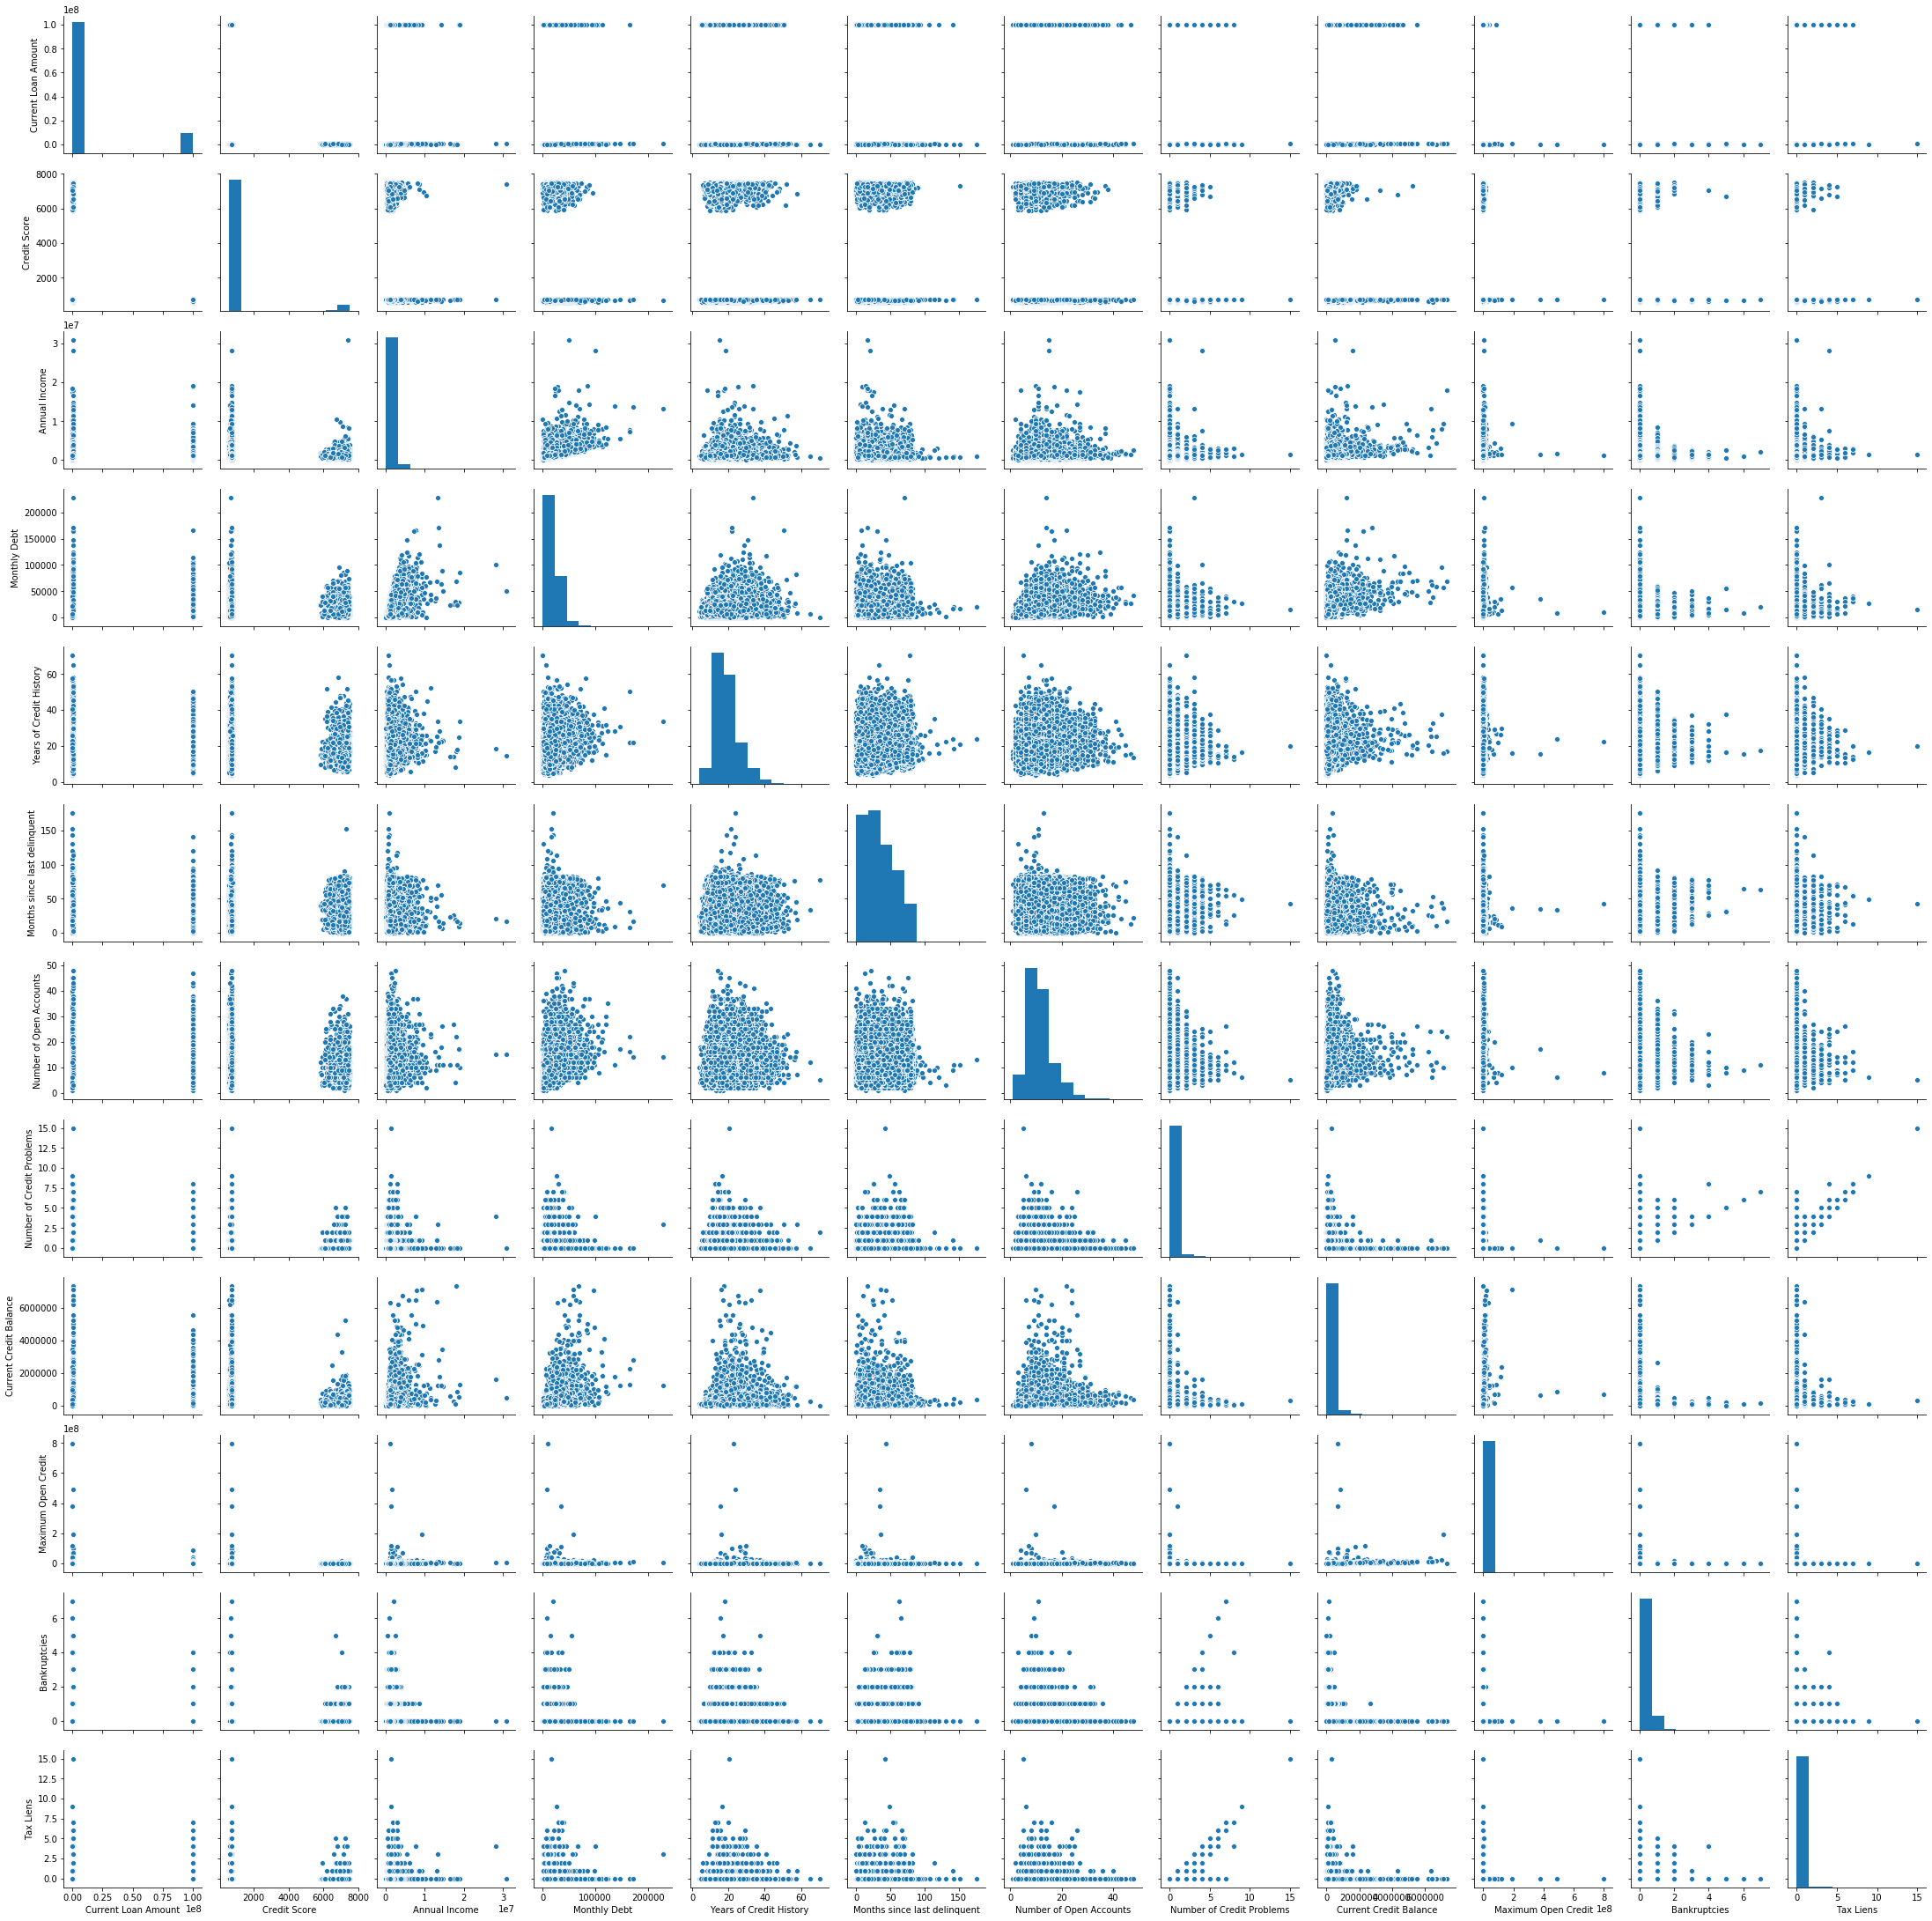

In [26]:
# sns.pairplot(bank_df)

## Observation

Data seems to be mainly categorical. Meaning that logistic regression would best fit this data.

The data would also have to be transformed, maybe a log transformation would help normalize data

## Checking Correlation

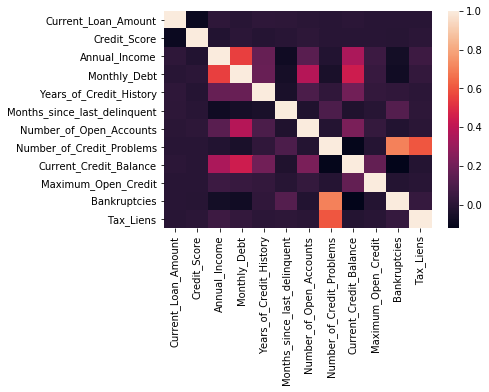

In [12]:
# calculate the correlation matrix
corr = bank_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

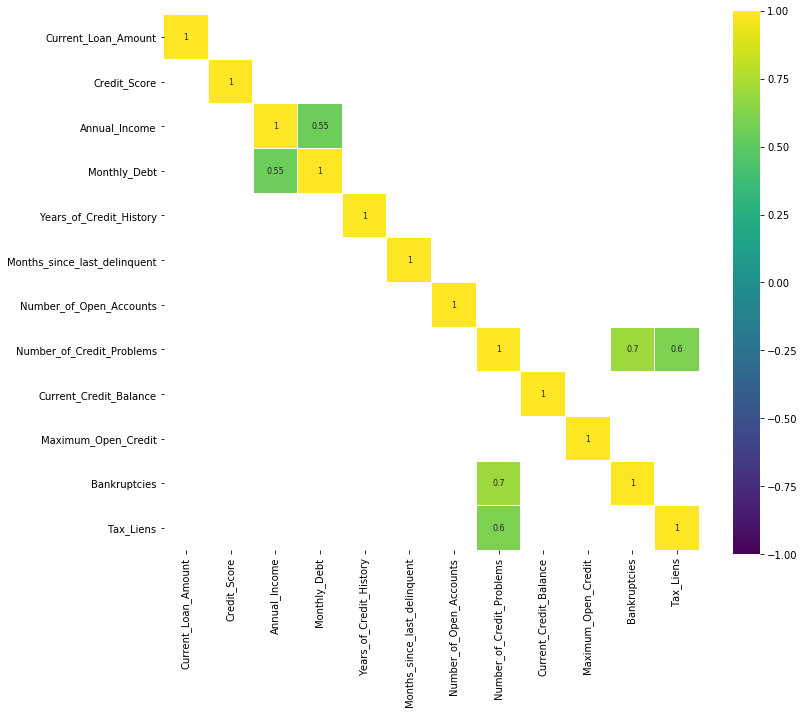

In [13]:
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## Observation 
- There are a few multicollinearity in the data

## Numeric Data Distribution

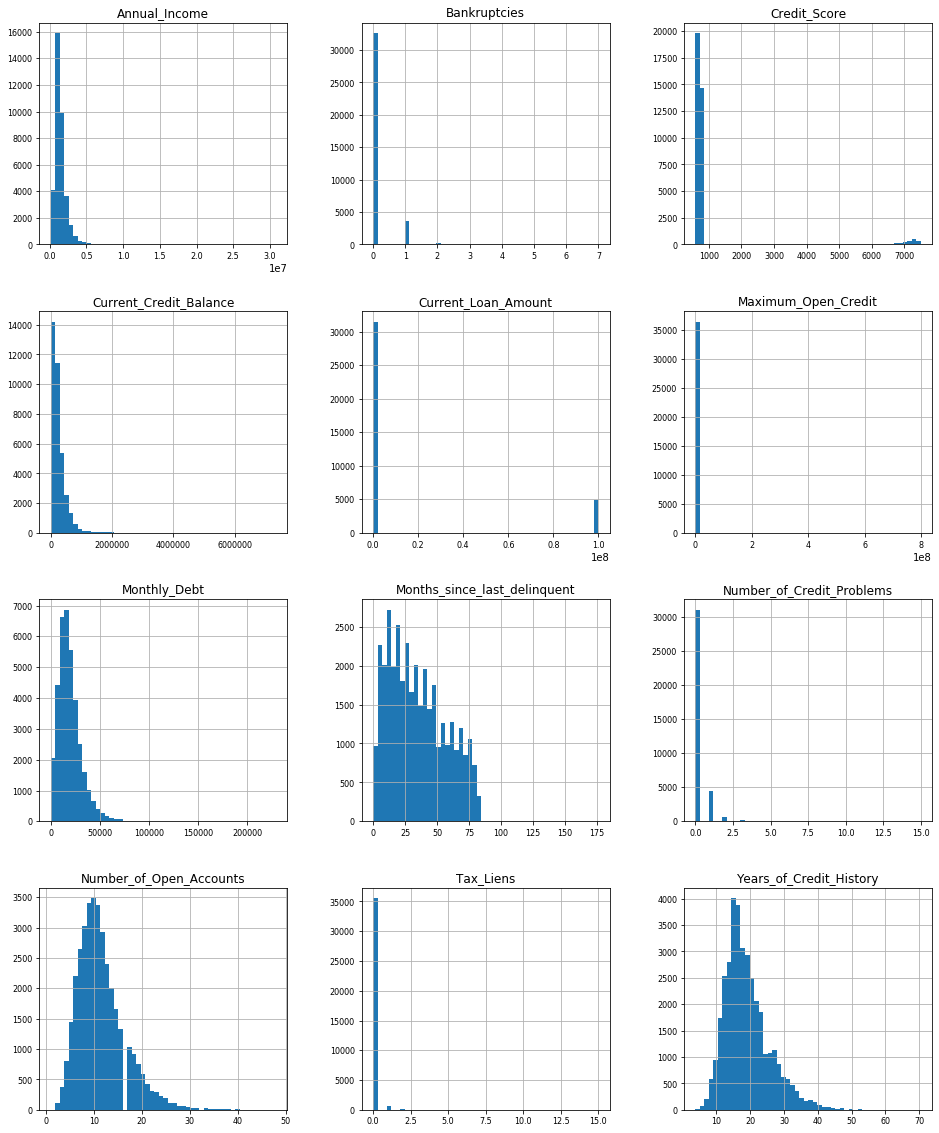

In [48]:
bank_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

### Looking Into Credit Score
Credit score shows high values

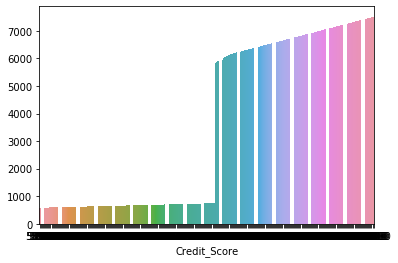

In [19]:
plt.figure(figsize=(10, 9))
sns.barplot(x=bank_df.Credit_Score, y=bank_df.Credit_Score.values, data=bank_df)

plt.show()

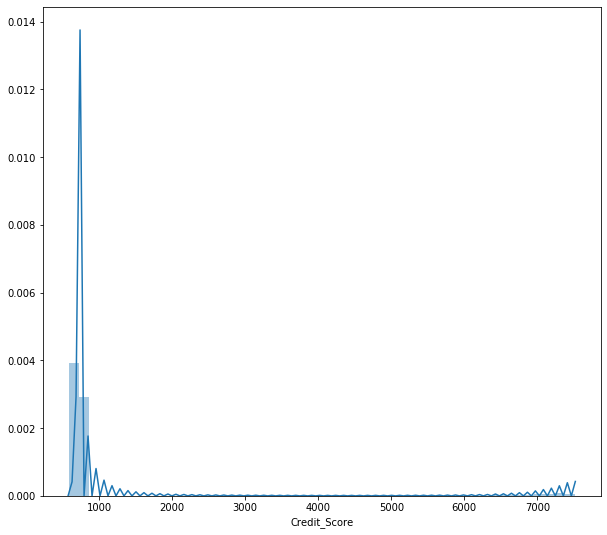

In [25]:
plt.figure(figsize=(10, 9))

# Distribution graph
sns.distplot(bank_df.Credit_Score)
plt.show()

In [27]:
# Checking credit score greater than 850
bank_df.Credit_Score.loc[bank_df.Credit_Score > 850].count()

1955

## Observation
- Data will need to be normalized/scaled
- Many of the distributions are skewed
- Credit score has values over 850 and will need to be dropped. The cap will be 850. 1,955 columns will be dropped

# Checking Categorical Values

## Purpose Column
There are many values in the Purpose column and will need to get rid of some values
- Values to get rid of:
    - other and Other
    - moving
    - wedding
    - vacation
    - Educational Expenses
    - renewable_energy
    
This means that values under 100 occurrences will be dropped

In [11]:
# Checking the Purpose column
bank_df.Purpose.value_counts()

Debt Consolidation      28202
Home Improvements        2409
other                    2313
Other                    1150
Business Loan             596
Medical Bills             444
Buy a Car                 428
Buy House                 263
Take a Trip               219
major_purchase            116
small_business            111
moving                     55
vacation                   41
wedding                    39
Educational Expenses       33
renewable_energy            4
Name: Purpose, dtype: int64

In [12]:
bank_df.Purpose.value_counts(normalize=True)

Debt Consolidation      0.774291
Home Improvements       0.066140
other                   0.063504
Other                   0.031573
Business Loan           0.016363
Medical Bills           0.012190
Buy a Car               0.011751
Buy House               0.007221
Take a Trip             0.006013
major_purchase          0.003185
small_business          0.003048
moving                  0.001510
vacation                0.001126
wedding                 0.001071
Educational Expenses    0.000906
renewable_energy        0.000110
Name: Purpose, dtype: float64

## Home Ownership Column

In [5]:
bank_df.Home_Ownership.value_counts()

Home Mortgage    18831
Rent             14300
Own Home          3205
HaveMortgage        87
Name: Home_Ownership, dtype: int64

## Years in Current Job Columns

In [6]:
bank_df.Years_in_current_job.value_counts()

10+ years    13149
2 years       3225
3 years       2997
< 1 year      2699
5 years       2487
4 years       2286
1 year        2247
6 years       2109
7 years       2082
8 years       1675
9 years       1467
Name: Years_in_current_job, dtype: int64

## Term Column

In [9]:
bank_df.Term.value_counts(normalize=True)

Short Term    0.709854
Long Term     0.290146
Name: Term, dtype: float64